### Import Library

In [122]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as plt

### Data Exploration

In [123]:
class_names = ["sedang", "penuh"]

In [124]:
train_datagen=ImageDataGenerator(rescale=1./255,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(r'D:/Datasets/Percobaan/Train',
                          target_size=(64, 64),
                          batch_size=32,
                          classes=class_names,
                          class_mode='categorical')

test_set=test_datagen.flow_from_directory(r'D:/Datasets/Percobaan/Test',
                       target_size=(64, 64),
                       batch_size=32,
                       classes=class_names,
                       class_mode='categorical')

Found 871 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


### CNN Model

In [125]:
model=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(2, activation='softmax')
])

In [126]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 15376)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               1968256   
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 258       
Total params: 1,968,962
Trainable params: 1,968,962
Non-trainable params: 0
_________________________________________________________________


### Model & Callback Function

In [128]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached >90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

### Fitting Model

In [129]:
history = model.fit(training_set,
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[callbacks])

Epoch 1/100
28/28 [==============================] - 235s 8s/step - loss: 0.8790 - accuracy: 0.6935 - val_loss: 1.1140 - val_accuracy: 0.2500
Epoch 2/100
28/28 [==============================] - 236s 8s/step - loss: 0.5658 - accuracy: 0.7371 - val_loss: 0.7553 - val_accuracy: 0.6818
Epoch 3/100
28/28 [==============================] - 238s 8s/step - loss: 0.4378 - accuracy: 0.8140 - val_loss: 1.0032 - val_accuracy: 0.5909
Epoch 4/100
28/28 [==============================] - 283s 10s/step - loss: 0.3917 - accuracy: 0.8324 - val_loss: 1.1187 - val_accuracy: 0.4545
Epoch 5/100
28/28 [==============================] - 285s 10s/step - loss: 0.3809 - accuracy: 0.8370 - val_loss: 1.0541 - val_accuracy: 0.6591
Epoch 6/100
28/28 [==============================] - 292s 10s/step - loss: 0.3533 - accuracy: 0.8507 - val_loss: 1.7762 - val_accuracy: 0.1818
Epoch 7/100
28/28 [==============================] - 285s 10s/step - loss: 0.3466 - accuracy: 0.8427 - val_loss: 1.4907 - val_accuracy: 0.2727
Ep

### Test Accuracy

In [130]:
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print('Loss : ', test_loss)
print('Accuracy :', test_accuracy)

2/2 [==============================] - 4s 2s/step - loss: 1.4052 - accuracy: 0.4773
Loss :  1.4052361249923706
Accuracy : 0.47727271914482117


### Graph Loss and Accuracy from Training and validation 

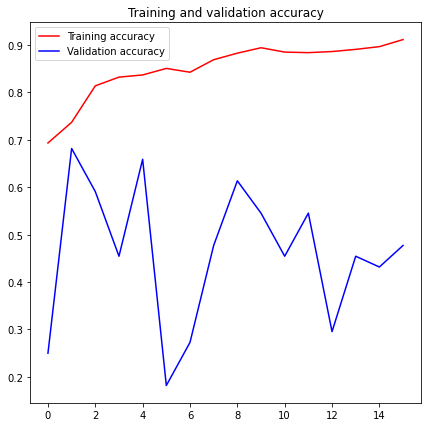

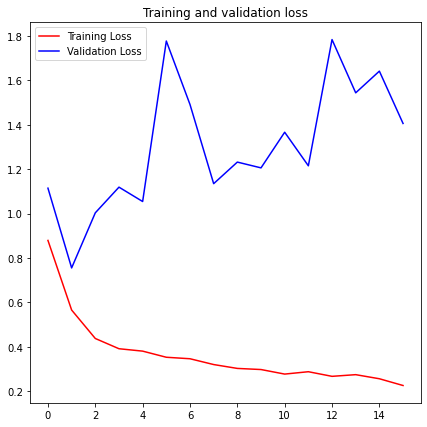

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Predict Model

In [132]:
test_image=image.load_img(r'D:/Datasets/Percobaan/Test/sedang/8.jpg', target_size=(64,64))
test_image=np.expand_dims(test_image, axis=0)

result=model.predict(test_image)

if result[0][0] == 1:
    print("Sedang")
elif result[0][1] == 1:
    print("Penuh")

Sedang


### Save model and Convert to tflite

In [133]:
# we will train 
import tensorflow as tf
import pathlib

# Construct a basic TF model.
root = tf.train.Checkpoint()
root.v1 = tf.Variable(3.)
root.v2 = tf.Variable(2.)
root.f = tf.function(lambda x: root.v1 * root.v2 * x)

# Save the model into temp directory
export_dir = "D:/Datasets/test_saved_model_3"
input_data = tf.constant(1., shape=[1, 1])
to_save = root.f.get_concrete_function(input_data)
tf.saved_model.save(root, export_dir, to_save)
# Convert the model into TF Lite.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
#save model 
tflite_model_files = pathlib.Path('D:/Datasets/save_model_tflite_3.tflite')
tflite_model_files.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: D:/Datasets/test_saved_model_3\assets


INFO:tensorflow:Assets written to: D:/Datasets/test_saved_model_3\assets


580